Clone the repo and Data unzip

In [1]:
!git clone https://github.com/AnjnaBhati12/assignments

Cloning into 'assignments'...
remote: Enumerating objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.


In [2]:
%cd "/content/assignments/data/saleforecasting"  

/content/assignments/data/saleforecasting


In [3]:
!unzip "sales-prediction.zip"

Archive:  sales-prediction.zip
  inflating: features.csv.zip        
   creating: __MACOSX/
  inflating: __MACOSX/._features.csv.zip  
  inflating: stores.csv              
  inflating: __MACOSX/._stores.csv   
  inflating: test.csv.zip            
  inflating: __MACOSX/._test.csv.zip  
  inflating: train.csv.zip           
  inflating: __MACOSX/._train.csv.zip  


In [4]:
!pip install autoviz


In [5]:
#importing the packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)
from autoviz.AutoViz_Class import AutoViz_Class


Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [6]:
#read data
features=pd.read_csv("features.csv.zip")
stores=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv.zip")
test=pd.read_csv("test.csv.zip")

In [7]:
dataframes_names = ['features','stores','train','test']
dataframes = [features,stores,train,test]
for i,j in zip(dataframes,dataframes_names):
  print("-----------------------For Dataframe {}-------------------------------\n".format(j))
  print(i.head(10))
  print('\n\n')
  print(i.info())
  print('\n\n')

-----------------------For Dataframe features-------------------------------

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   
5      1  2010-03-12        57.79       2.667        NaN        NaN   
6      1  2010-03-19        54.58       2.720        NaN        NaN   
7      1  2010-03-26        51.45       2.732        NaN        NaN   
8      1  2010-04-02        62.27       2.719        NaN        NaN   
9      1  2010-04-09        65.86       2.770        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      

Above we can see only features dataframe has many null values and during EDA, we will check how to treat those missing values

In [8]:
#merging the features and stores dataframe to train and test dataframe 
train = train.merge(stores, how='left').merge(features, how='left')
test = test.merge(stores, how='left').merge(features, how='left')

In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [10]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


# EDA

Shape of your Data Set: (45, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    3 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables


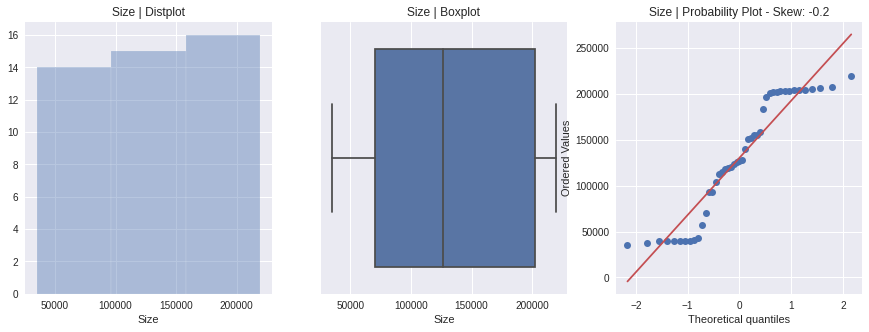

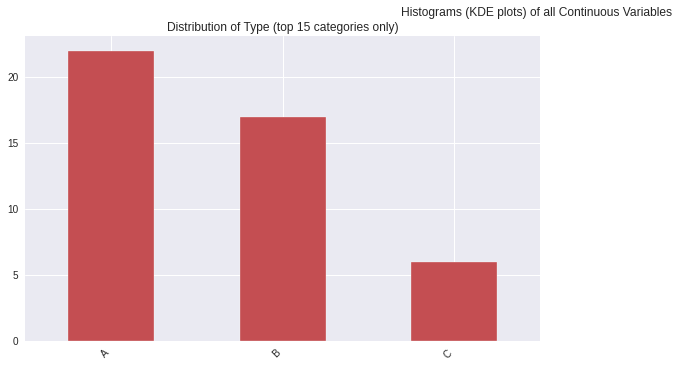

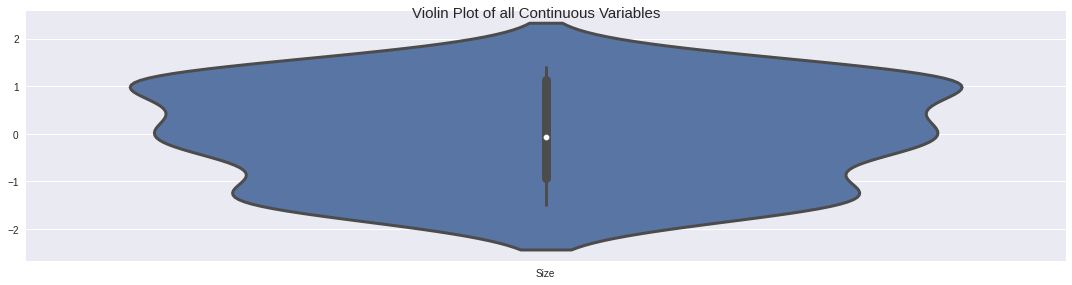

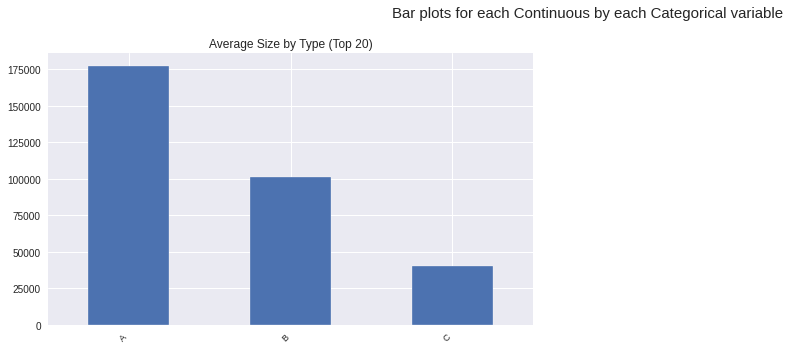

Time to run AutoViz (in seconds) = 1.457

 ###################### VISUALIZATION Completed ########################


,Type,Size
0,A,151315
1,A,202307
2,B,37392
3,A,205863
4,B,34875
5,A,202505
6,B,70713
7,A,155078
8,B,125833
9,B,126512


In [11]:
#analyzing the stores type and size data
AV = AutoViz_Class()
AV.AutoViz('stores.csv')

Using above plots we can see the univariate analysis and bivariate analysis of size and type and can see :
1. Most of the stores are of type A and very less of type C.
2. Max stores having size between 15000-20000 .
3. Type of store and size of store are related to each other as size of type A store > store B > store C 

Shape of your Data Set: (8190, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 45


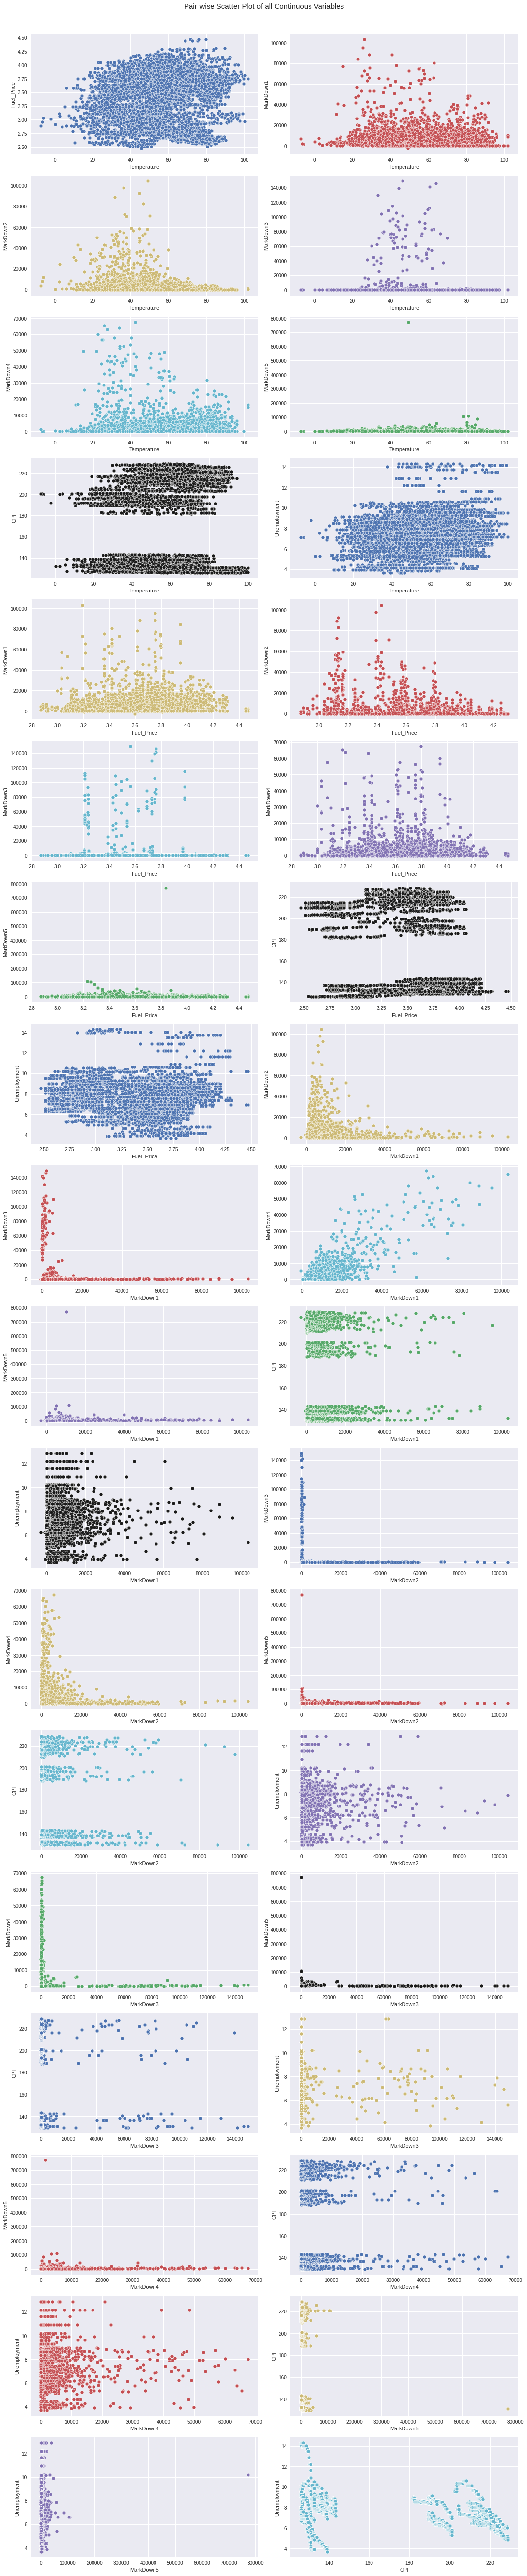

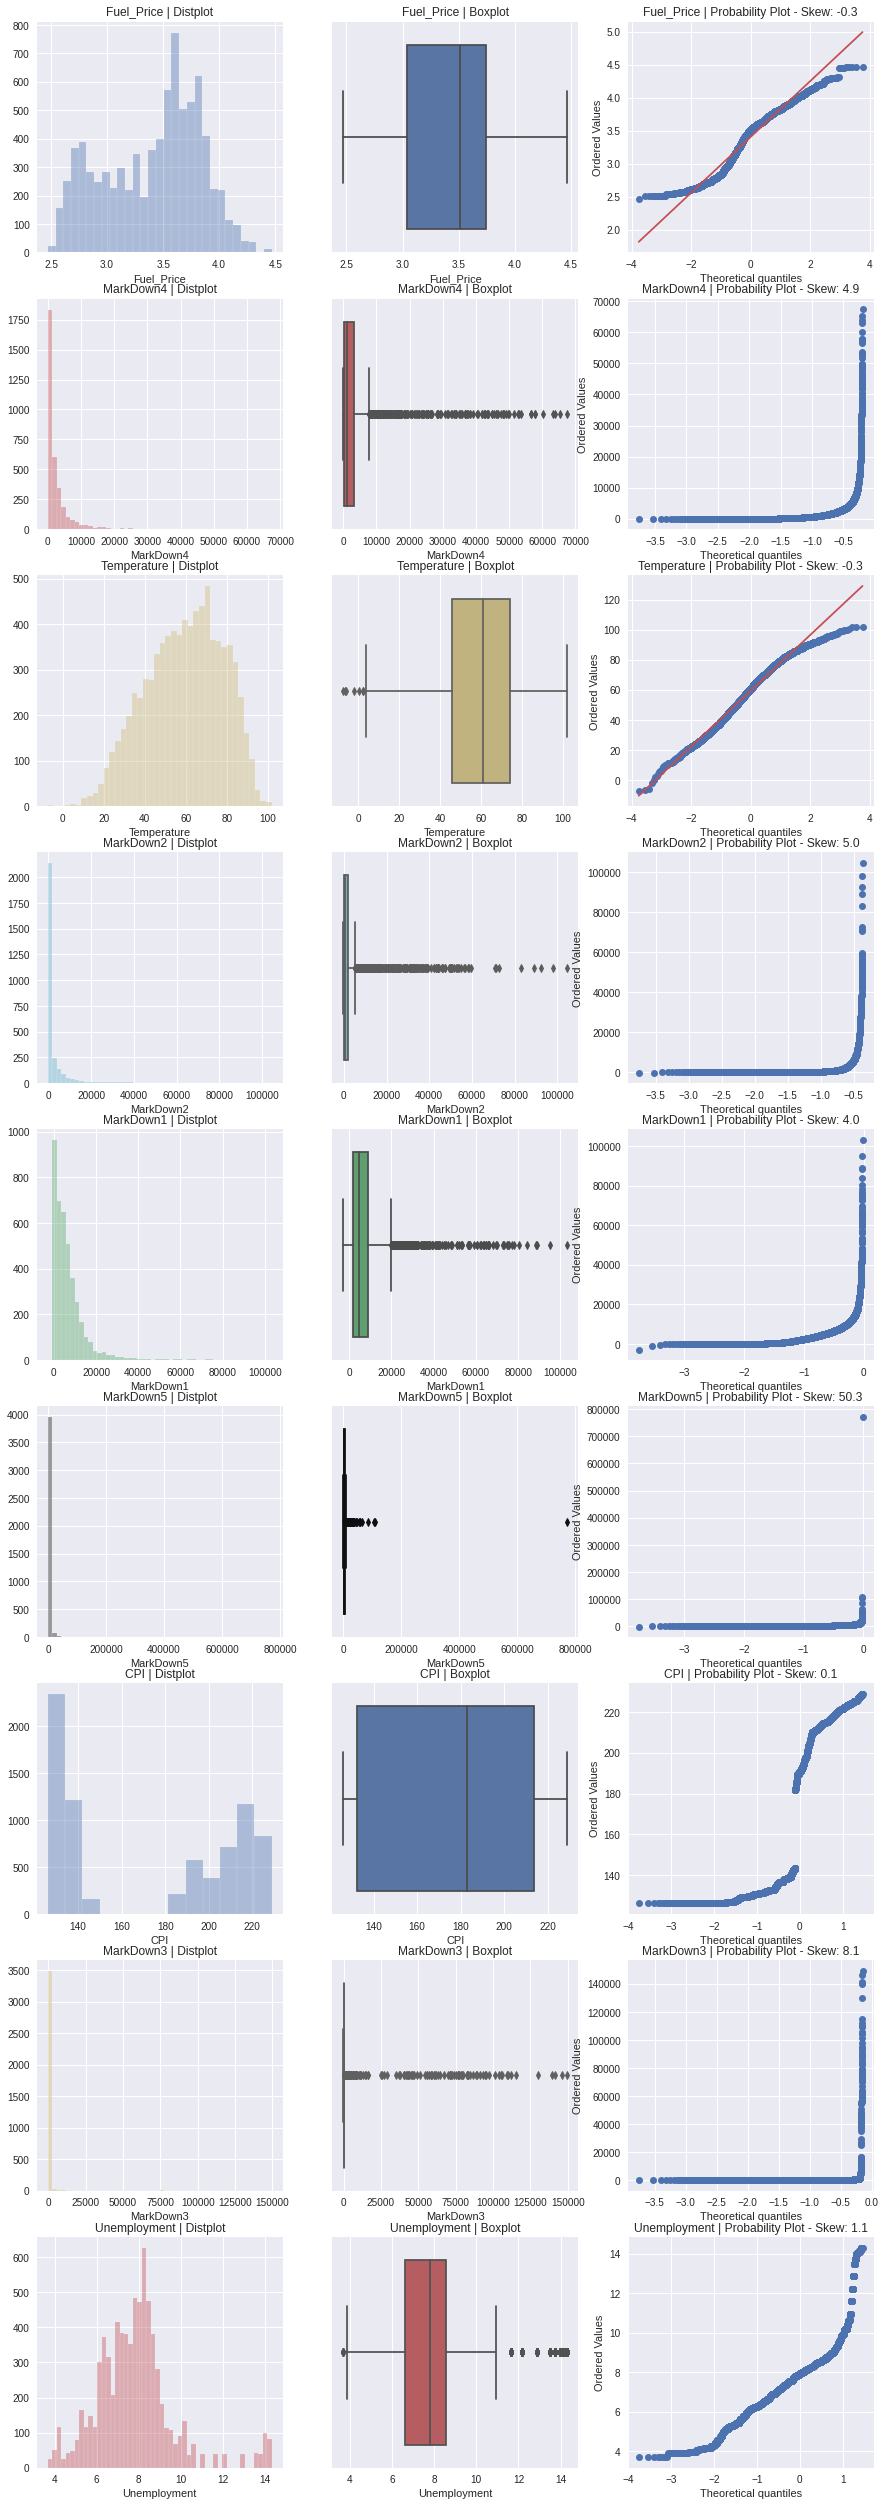

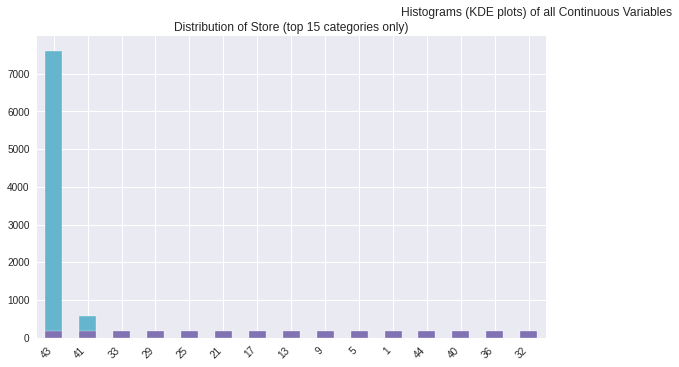

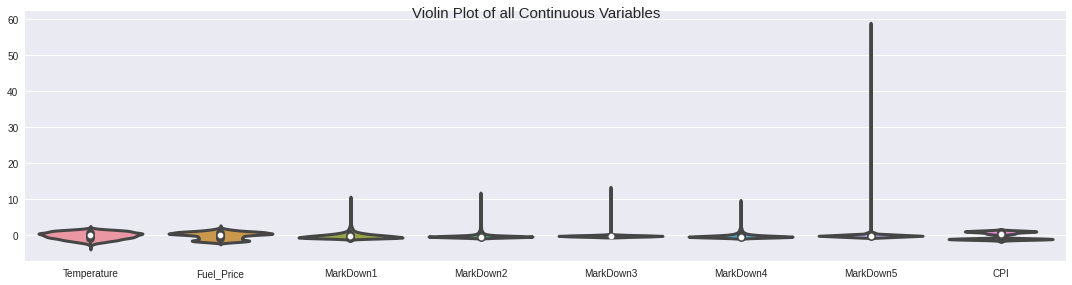

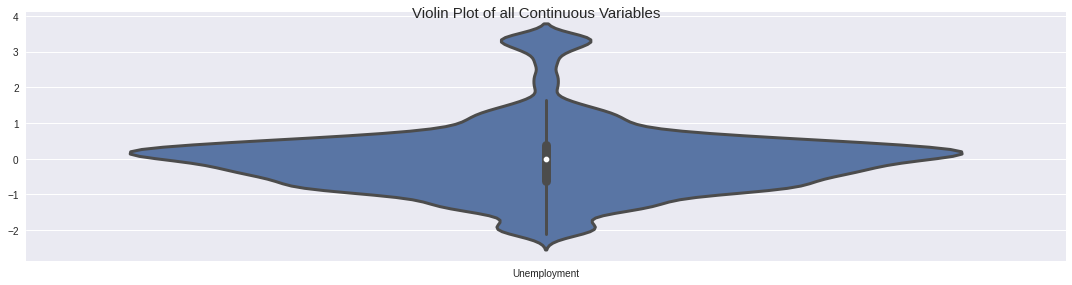

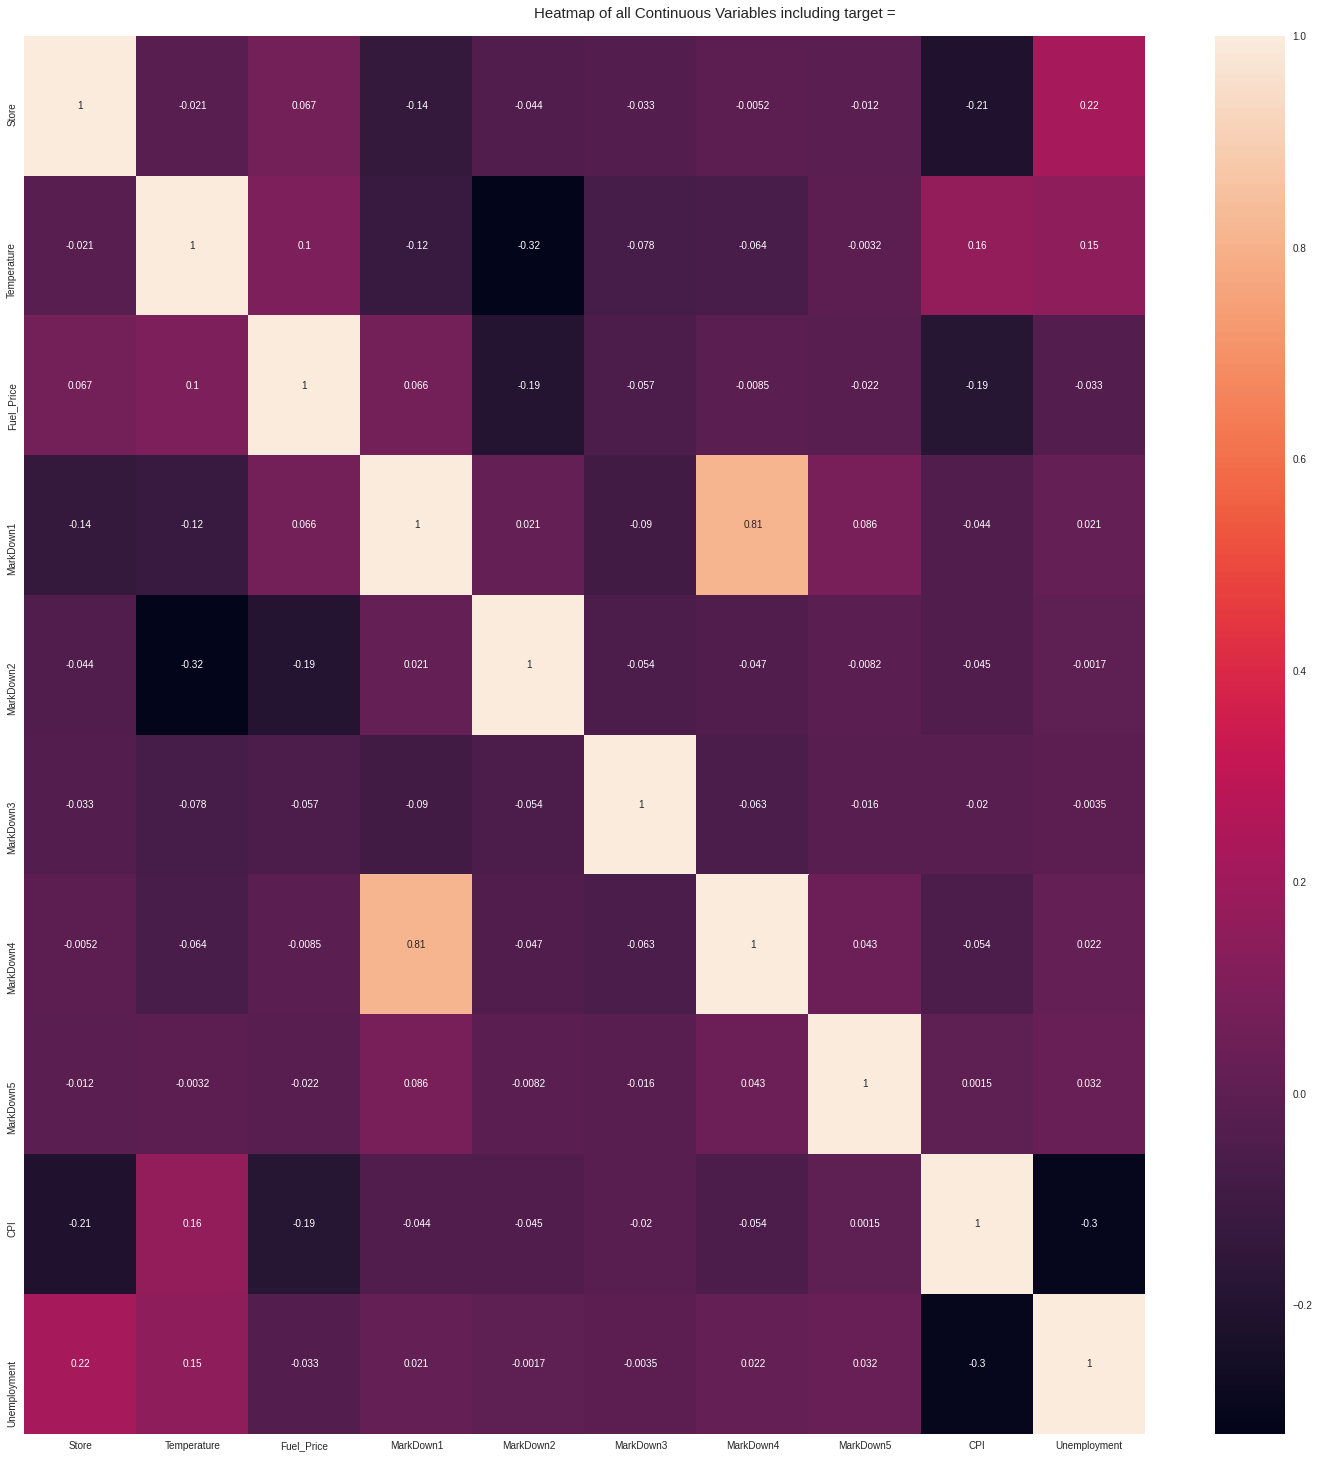

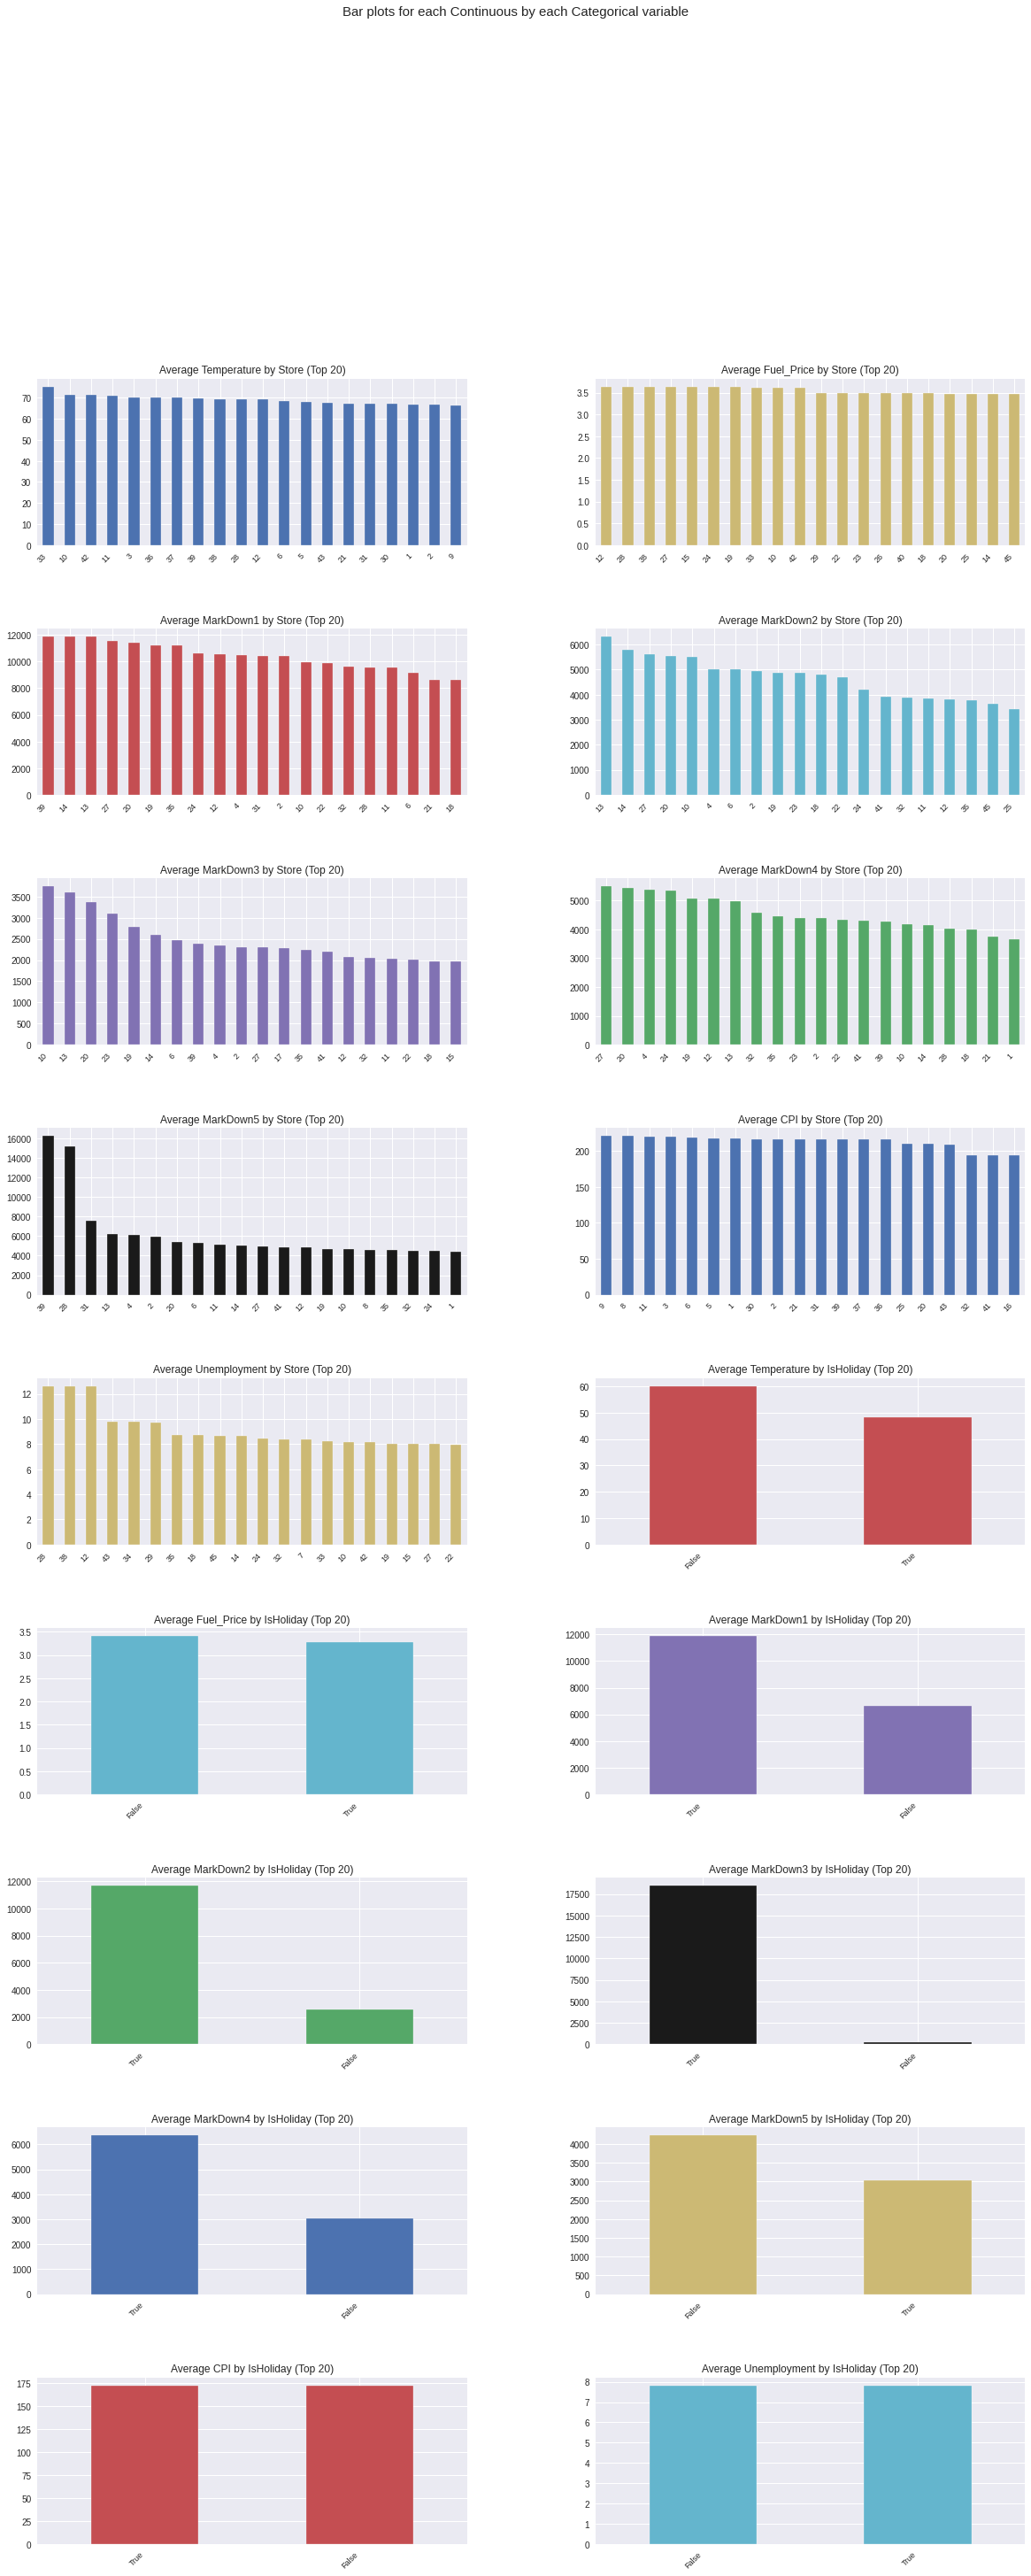

Time to run AutoViz (in seconds) = 26.503

 ###################### VISUALIZATION Completed ########################


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [12]:
#analyzing the other features of stores
AV = AutoViz_Class()
AV.AutoViz('features.csv.zip')

1. Using scatter plots between continuous variables we check how they affect each other or if they are correlated for example at high temperature we see higher unemployment rates in some stores than at lower temperature.

2. Univariate distribution of each numeric and categorical variable is shown to identify the common range of a continuous variable or common values a categorical variable take.

3. Correlation plot shows high correlation between Markdown 1 and Markdown 4.

4. Bar plots to show the bivariate distribution of categorical variable store and each continuous variable. 

5. Stores 28,38 and 12 having highest unemployment , more holidays during the winters.

In [13]:
#analyzing the sales data in training data now with respect to stores and their features
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Week'] = train['Date'].dt.isocalendar().week
test['Week'] = test['Date'].dt.week

train['Year'] = train['Date'].dt.isocalendar().year
test['Year'] = test['Date'].dt.year


In [14]:
print("Train Data Starting Date : ", train['Date'].min())
print("Train Data End Date :", train['Date'].max())
print("Test Data Starting Date : ", test['Date'].min())
print("Test Data End Date :", test['Date'].max())

Train Data Starting Date :  2010-02-05 00:00:00
Train Data End Date : 2012-10-26 00:00:00
Test Data Starting Date :  2012-11-02 00:00:00
Test Data End Date : 2013-07-26 00:00:00


In [15]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Week                    UInt32
Year                    UInt32
dtype: object

In [16]:
#convert the string cateorical variables like Isholoday and Type to numeric format
train['Type'] = train['Type'] .apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
train['IsHoliday'] = train['IsHoliday'].apply(lambda x: 1 if x == True else 0)

cols = train.columns.drop(['Date'])
train[cols] = train[cols].apply(pd.to_numeric, errors='coerce')

test['Type'] = test['Type'].apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
test['IsHoliday'] = test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

cols = test.columns.drop(['Date'])
test[cols] = test[cols].apply(pd.to_numeric, errors='coerce')

In [17]:
train_nulls = (train.isnull().sum(axis = 0)/len(train))*100
train_nulls

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Week             0.000000
Year             0.000000
dtype: float64

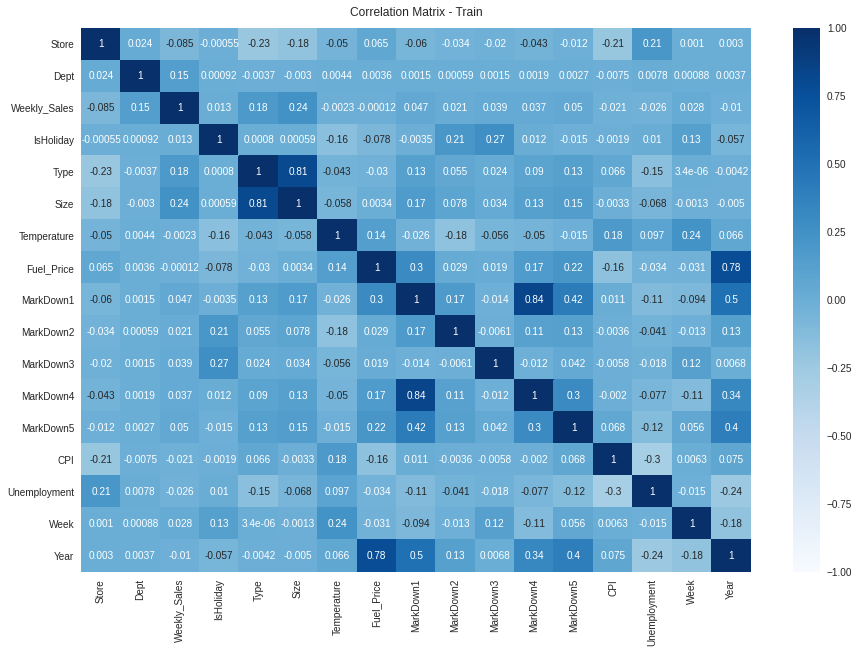

In [24]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - Train', fontdict={'fontsize':12}, pad=12);

The variables size, followed by the type and dept variables, appear to have the greatest impact on Weekly Sales.
As plot shows Markdown features are somewhat correalted to features like Isholiday , Type or Size so not removing these variables because of the large number of missing values in them .By imputing some value for missing markdown values and plotting the above feature plots we can check if this is case of 'Missing Not at Random' or not too.

In [19]:
test_nulls = (test.isnull().sum(axis = 0)/len(test))*100
test_nulls

Store            0.000000
Dept             0.000000
Date             0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI             33.165890
Unemployment    33.165890
Week             0.000000
Year             0.000000
dtype: float64

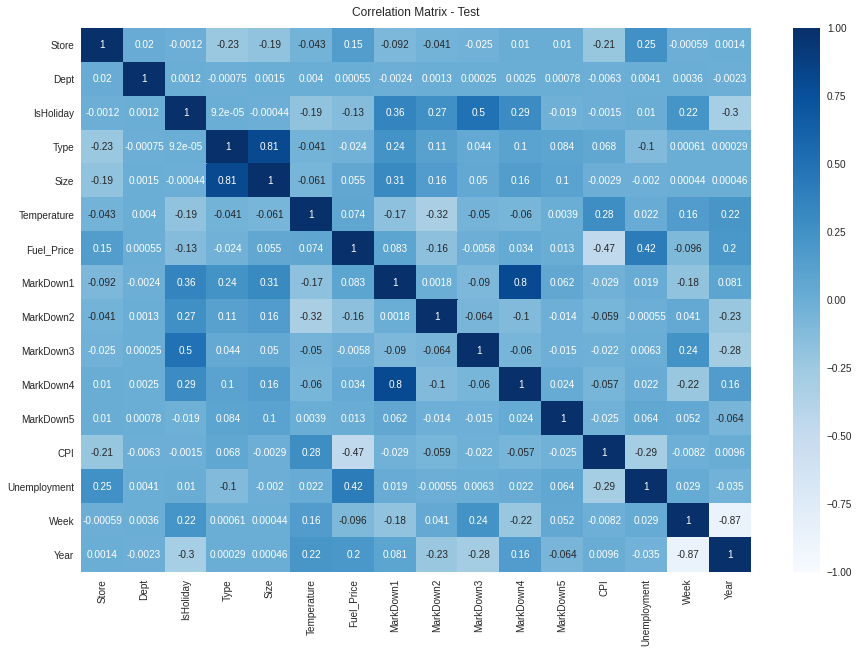

In [20]:
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(test.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - Test', fontdict={'fontsize':12}, pad=12);


In [21]:
train = train.fillna(0)
test = test.fillna(0)

In [22]:
weekly_sales = train.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = train.loc[train['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = train.loc[train['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = train.loc[train['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

Text(0.5, 1.0, 'Average Weekly Sales')

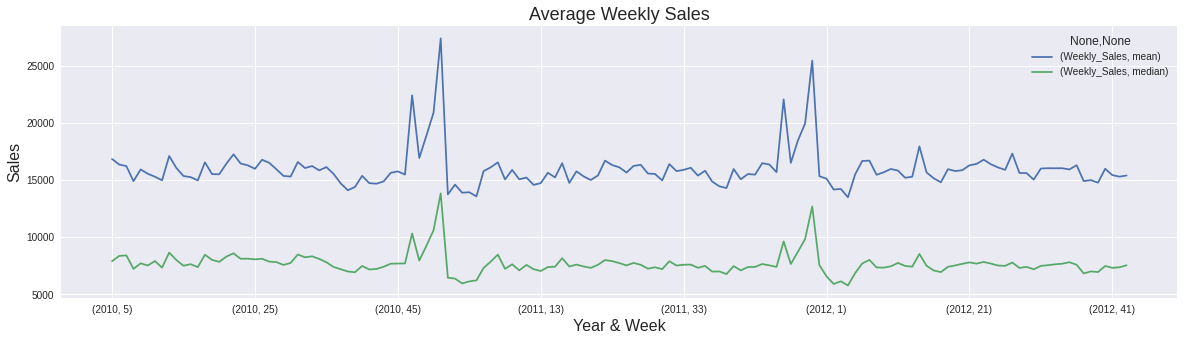

In [27]:
weekly_sales.plot(figsize=(20,5))
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Year & Week', fontsize=16)
plt.title('Average Weekly Sales', fontsize=18)

In general, the average values are well above the median, which indicates a high dispersion and variation in sales by stores and departments in a week.Company has good sales in last weeks of december *month*

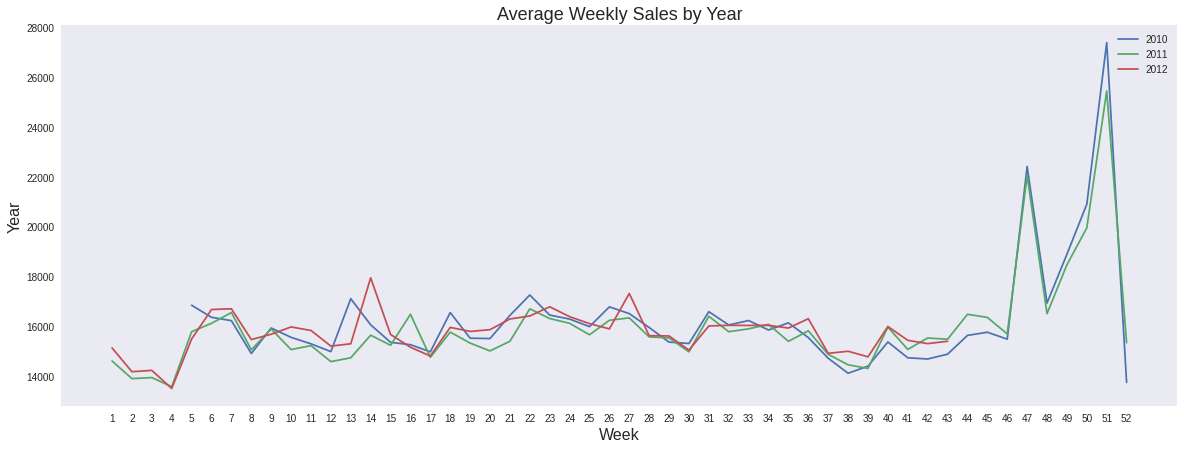

In [25]:

plt.figure(figsize=(20, 7))

sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.xlabel('Week', fontsize=16)
plt.ylabel('Year', fontsize=16)
plt.title('Average Weekly Sales by Year', fontsize=18)
plt.show()

Same pattern is observed between weekly sales in different years.

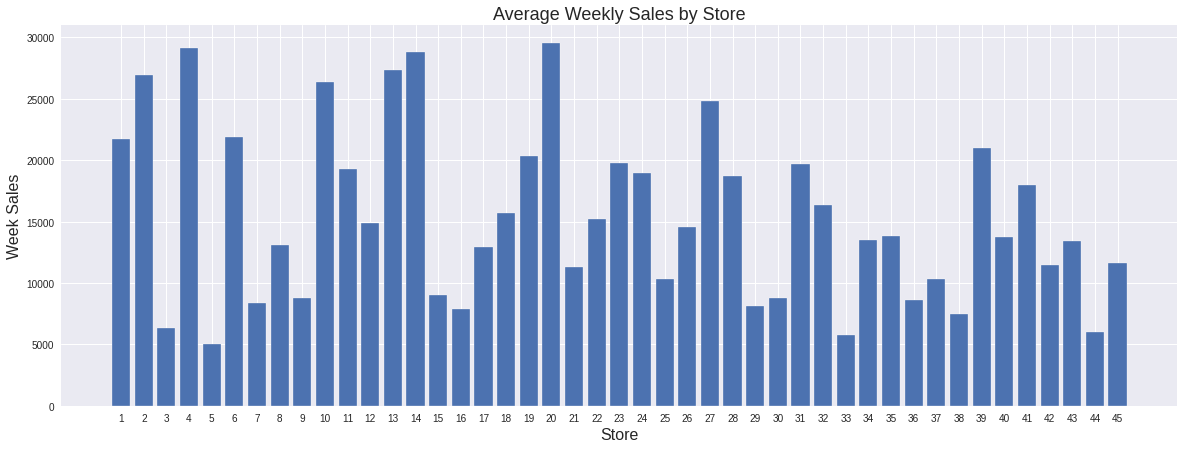

In [29]:
# average weekly sales on store level 
stores = train.groupby(['Store']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(20, 7))
plt.bar(stores.index,stores['Weekly_Sales']['mean'])
plt.xticks(np.arange(1, 46, step=1))
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.title('Average Weekly Sales by Store', fontsize=18)
plt.show()

There is a strong variation in sales volume between stores, ranging from 5000 up to 30000.

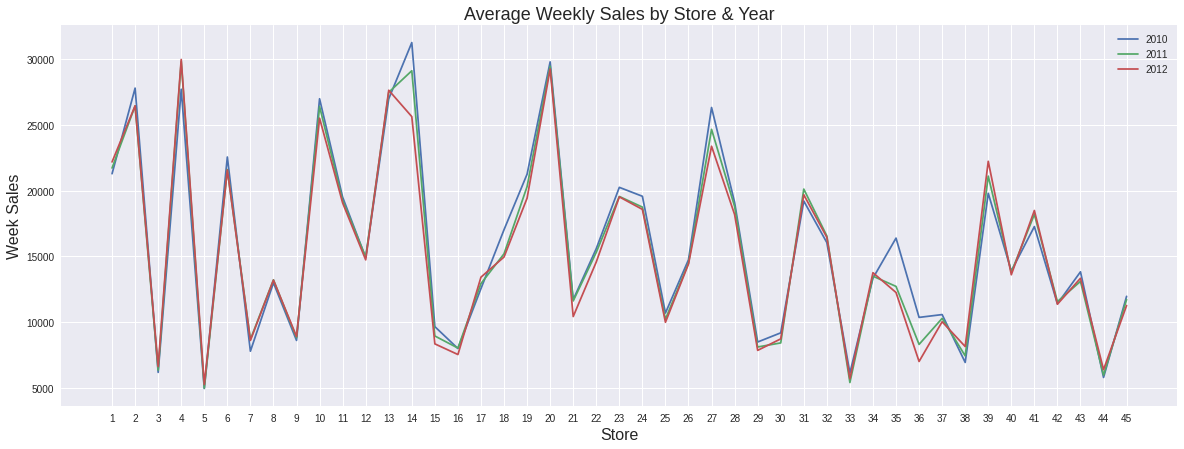

In [30]:
stores_sales2010 = train.loc[train['Year']==2010].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})
stores_sales2011 = train.loc[train['Year']==2011].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})
stores_sales2012 = train.loc[train['Year']==2012].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(stores_sales2010['Weekly_Sales']['mean'].index, stores_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(stores_sales2011['Weekly_Sales']['mean'].index, stores_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(stores_sales2012['Weekly_Sales']['mean'].index, stores_sales2012['Weekly_Sales']['mean'].values)

plt.xticks(np.arange(1, 46, step=1))
plt.legend(['2010', '2011', '2012'])
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.title('Average Weekly Sales by Store & Year', fontsize=18)
plt.show()

Sales pattern remain almost same over the years for all stores .Some stores showed a decrease in sales over the years, such as stores 14, 27, 35 and 36.

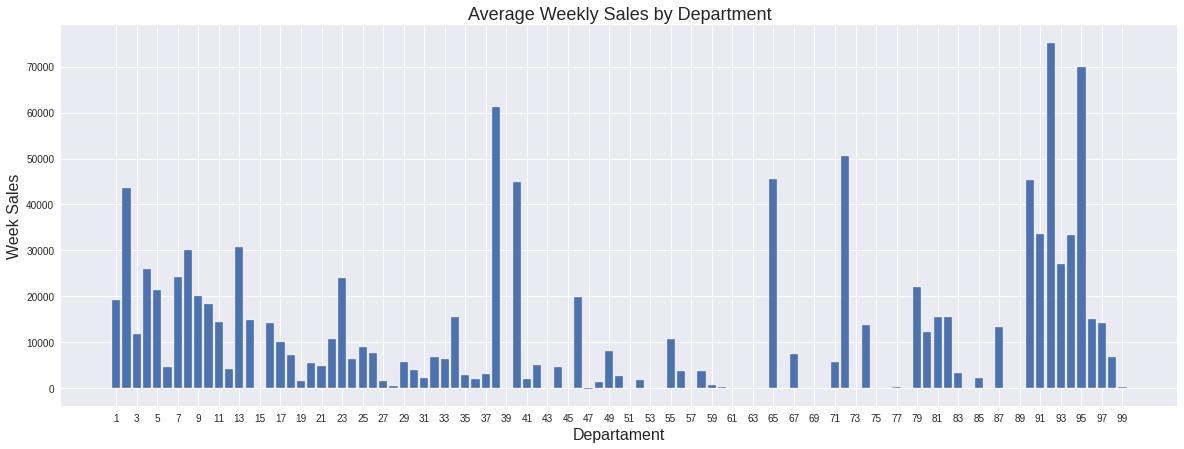

In [32]:
# average weekly sales on department level 
departament = train.groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
plt.bar(departament.index,departament['Weekly_Sales']['mean'])
plt.xticks(np.arange(1, 100, step=2))
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Departament', fontsize=16)
plt.title('Average Weekly Sales by Department', fontsize=18)
plt.show()

Weekly sales by department are even more irregular, with departments with average sales ranging from 0 to more than 70000.

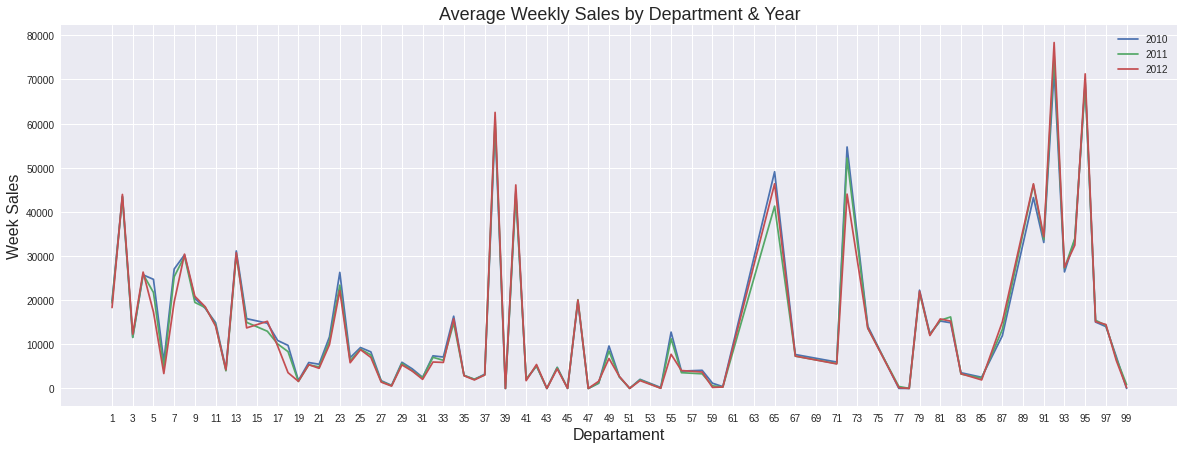

In [33]:
departament_sales2010 = train.loc[train['Year']==2010].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})
departament_sales2011 = train.loc[train['Year']==2011].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})
departament_sales2012 = train.loc[train['Year']==2012].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(departament_sales2010['Weekly_Sales']['mean'].index, departament_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(departament_sales2011['Weekly_Sales']['mean'].index, departament_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(departament_sales2012['Weekly_Sales']['mean'].index, departament_sales2012['Weekly_Sales']['mean'].values)

plt.xticks(np.arange(1, 100, step=2))
plt.legend(['2010', '2011', '2012'])

plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Departament', fontsize=16)
plt.title('Average Weekly Sales by Department & Year', fontsize=18)
plt.show()


Despite this discrepancy in weekly sales by departament, this behavior seems to remain stable over the years. Some departaments showed a decrease in sales over the years, such as departaments 18, 65 and 73.

Text(0.5, 1.0, 'Average Weekly Sales by Size')

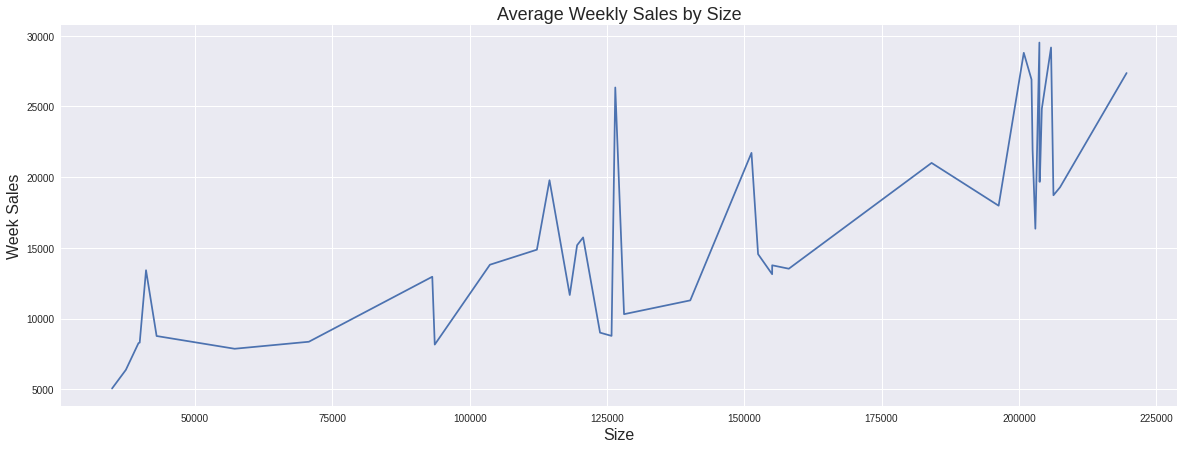

In [35]:
size = train.groupby(['Size']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(20, 7))
plt.plot(size)
#plt.xticks(np.arange(1, 100, step=2))
#plt.show()

plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Size', fontsize=16)
plt.title('Average Weekly Sales by Size', fontsize=18)

Grouping weekly sales by store size, the chart below seems to indicate a certain trend towards higher sales for larger stores

Text(0.5, 1.0, 'Weekly Sales by Type')

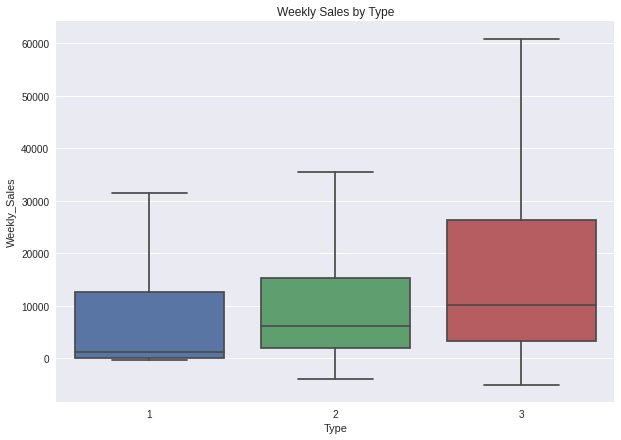

In [37]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=train,showfliers = False)
plt.title('Weekly Sales by Type')

Type 'A' (transformed to '3') has a higher sales median than types 'B' and 'C', in addition to a greater dispersion of sales values around this median.

Text(0.5, 1.0, 'Weekly Sales by Type')

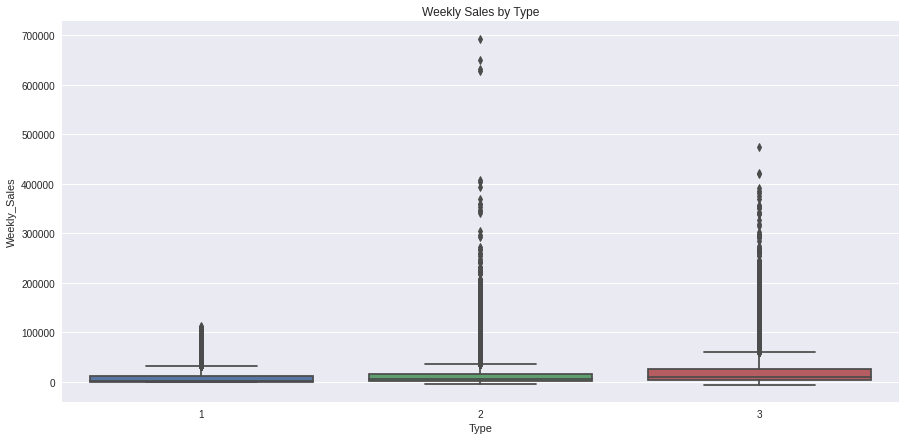

In [38]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=train,showfliers = True)
plt.title('Weekly Sales by Type')

Plotted the same graph as above but without removing the outliers.The three types have many outlier records.



# Modeling

In [40]:
# As holidays consists of larger part of sales , it would be good idea to give more weightage to error in prediction in sales during the holidays

sample_weight = train['IsHoliday'].apply(lambda x: 1 if x==0 else 3)
sample_weight_frame = pd.DataFrame(sample_weight, index=train.index)


In [44]:

from sklearn.metrics import make_scorer

def WMAE(y_test, y_pred):
        y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
        
        weights_3 = sample_weight_frame.loc[(y_test.index)].loc[sample_weight_frame.IsHoliday==3].index
        weights_1 = sample_weight_frame.loc[(y_test.index)].loc[sample_weight_frame.IsHoliday==1].index
        
        sum_3 = np.sum(3*(abs(y_test.loc[weights_3].values-y_pred_df.loc[weights_3].values)))
        sum_1 = np.sum(abs(y_test.loc[weights_1].values-y_pred_df.loc[weights_1].values))           
        
        return np.round((sum_3+sum_1)/(3*len(weights_3)+len(weights_1)),2)
 
my_score = make_scorer(WMAE,greater_is_better=False)

In [45]:
train_all = train.drop(['Date'],axis=1)
train_all

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Year
0,1,1,24924.50,0,3,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,2010
1,1,1,46039.49,1,3,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,6,2010
2,1,1,41595.55,0,3,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,7,2010
3,1,1,19403.54,0,3,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,8,2010
4,1,1,21827.90,0,3,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,2,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,39,2012
421566,45,98,628.10,0,2,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,40,2012
421567,45,98,1061.02,0,2,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,41,2012
421568,45,98,760.01,0,2,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,42,2012


In [46]:
y_train_all = train_all.loc[:, ['Weekly_Sales']]
x_train_all = train_all.drop(['Weekly_Sales'], axis=1)

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)

(337256, 16)
(84314, 16)


In [49]:
#RandomForest, ExtraTrees, XGB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

clf = RandomForestRegressor(random_state=0)

pipe = Pipeline(steps=[('clf', clf)])

param_grid = [ {
                'clf':[RandomForestRegressor()],
                'clf__n_estimators': [50,100,150],
                'clf__max_depth': [10,20,30]
                },
               
                {
                'clf': [ExtraTreesRegressor()],
                'clf__n_estimators': [50,100,150],
                'clf__max_depth': [10,20,30]
                },
               
                {
                'clf': [XGBRegressor()],  
                'clf__learning_rate':[0.1,0.05],
                'clf__min_samples_split':[5,7,9],
                'clf__max_depth':[10,20,30]
                }
              
              ]

rscv_all_tree = RandomizedSearchCV(pipe, param_grid, cv = 3, scoring = my_score, n_jobs=-1)
model_all_tree = rscv_all_tree.fit(x_train, y_train)

In [50]:
rscv_all_tree.best_estimator_

Pipeline(memory=None,
         steps=[('clf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=30,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [51]:
y_pred = rscv_all_tree.best_estimator_.predict(x_test)
print('WMAE:', WMAE(y_test, y_pred))

WMAE: 1525.44


**TRAINING WITH MAIN FEATURES**

In an attempt to obtain even better results in the prediction, models were also trained only with the features of greatest impact in the "Weekly Sales", based on the correlation matrix.

Therefore, the features with the highest correlation ("Size", "Type" and "Dept") were used to train these models, in addition to "IsHoliday", needed to calculate the evaluation metric and the features "Store", "Week" and "Year", essential for identifying the record and future prediction.

In [52]:
train_relevant = train.drop(['Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)
train_relevant

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week,Year
0,1,1,24924.50,0,3,151315,5,2010
1,1,1,46039.49,1,3,151315,6,2010
2,1,1,41595.55,0,3,151315,7,2010
3,1,1,19403.54,0,3,151315,8,2010
4,1,1,21827.90,0,3,151315,9,2010
...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,2,118221,39,2012
421566,45,98,628.10,0,2,118221,40,2012
421567,45,98,1061.02,0,2,118221,41,2012
421568,45,98,760.01,0,2,118221,42,2012


In [53]:
y_relevant = train_relevant.loc[:, ['Weekly_Sales']]
x_relevant = train_relevant.drop(['Weekly_Sales'], axis=1)

In [54]:
from sklearn.model_selection import train_test_split

x_train_relevant, x_test_relevant, y_train_relevant, y_test_relevant = train_test_split(x_relevant, y_relevant, test_size=0.2, random_state=0)

print(x_train_relevant.shape)
print(x_test_relevant.shape)

(337256, 7)
(84314, 7)


In [59]:
clf = RandomForestRegressor(random_state=0)

pipe = Pipeline(steps=[('clf', clf)])

param_grid = [ {
                'clf':[RandomForestRegressor()],
                'clf__n_estimators': [50,100,150],
                'clf__max_depth': [10,20,30]
                },
               
                {
                'clf': [ExtraTreesRegressor()],
                'clf__n_estimators': [50,100,150],
                'clf__max_depth': [10,20,30]
                },
               
                {
                'clf': [XGBRegressor()],  
                'clf__learning_rate':[0.1,0.05],
                'clf__min_samples_split':[5,7,9],
                'clf__max_depth':[10,20,30]
                }
              ]

rscv_relevant_tree = RandomizedSearchCV(pipe, param_grid, cv = 3, scoring = my_score, n_jobs=-1)
model_relevant_tree = rscv_relevant_tree.fit(x_train_relevant, y_train_relevant)


In [60]:
rscv_relevant_tree.best_estimator_

Pipeline(memory=None,
         steps=[('clf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=30,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [83]:
y_pred= rscv_relevant_tree.best_estimator_.predict(x_test_relevant)
print('WMAE:', WMAE(y_test_relevant, y_pred))

WMAE: 1427.12


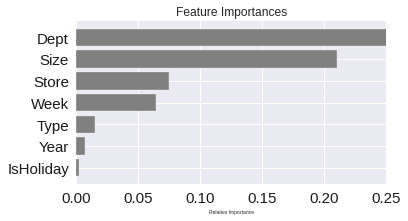

In [84]:
plt.rcParams["figure.figsize"] = (5,3)

importances = rscv_relevant_tree.best_estimator_._final_estimator.feature_importances_

attributes = list(x_train_relevant.columns)
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='gray', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=5)
plt.xlabel('Relative Importance',fontsize=5)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.xlim([0.0, 0.25])
plt.show()

In [ ]:
#prediction on the test data
date = test['Date']
test = test.drop(['Date'], axis=1)
test_relevant = test.drop(['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI', 'Unemployment'],axis=1)
test_relevant = test_relevant.sort_values(['Store', 'Dept'], ascending=[True, True])

In [87]:
y_pred_rf = rscv_relevant_tree.best_estimator_.predict(test_relevant)

In [88]:
test_relevant['Date'] = date
test_relevant = test_relevant.sort_values(['Store', 'Dept'], ascending=[True, True])
test_relevant['Weekly_Sales'] = y_pred_rf
test_relevant

,Store,Dept,IsHoliday,Type,Size,Week,Year,Date,Weekly_Sales
0,1,1,0,3,151315,44,2012,2012-11-02,33602.3642
1,1,1,0,3,151315,45,2012,2012-11-09,19182.4294
2,1,1,0,3,151315,46,2012,2012-11-16,19384.4894
3,1,1,1,3,151315,47,2012,2012-11-23,20482.8336
4,1,1,0,3,151315,48,2012,2012-11-30,23364.4904
...,...,...,...,...,...,...,...,...,...
115059,45,98,0,2,118221,26,2013,2013-06-28,638.3914
115060,45,98,0,2,118221,27,2013,2013-07-05,666.2402
115061,45,98,0,2,118221,28,2013,2013-07-12,692.9044
115062,45,98,0,2,118221,29,2013,2013-07-19,783.4018


In [91]:
test_relevant.columns

Index(['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Week', 'Year', 'Date',
       'Weekly_Sales'],
      dtype='object')

In [92]:
test_relevant[['Store', 'Dept', 'Date','IsHoliday','Weekly_Sales']].to_csv('Assignment-Test_Data-Output.csv',index=False)

In [90]:
test

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Year
0,1,1,0,3,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,44,2012
1,1,1,0,3,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,45,2012
2,1,1,0,3,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,46,2012
3,1,1,1,3,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,47,2012
4,1,1,0,3,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,0,2,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,26,2013
115060,45,98,0,2,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,27,2013
115061,45,98,0,2,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,28,2013
115062,45,98,0,2,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,29,2013


Text(0.5, 1.0, 'Predicted Test Sales plotted with Sales in Training Data')

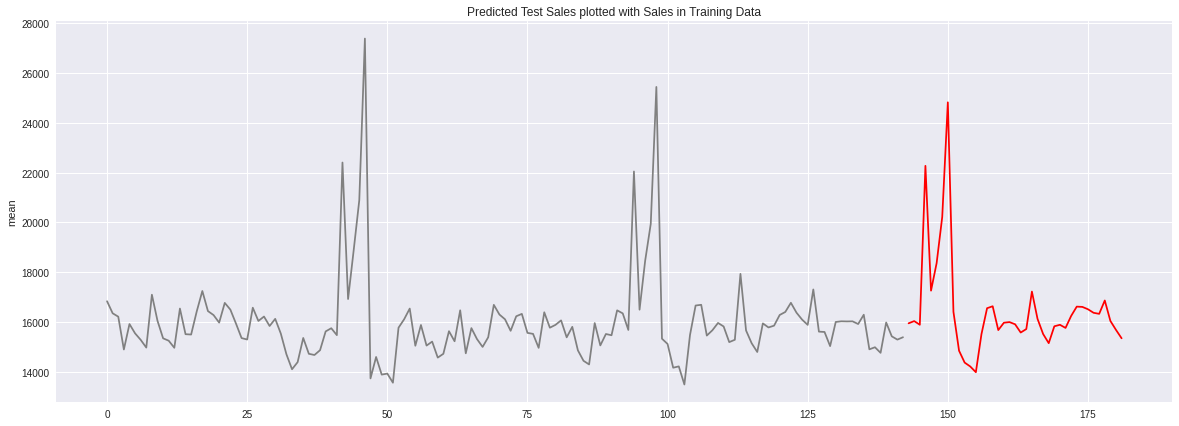

In [97]:
test = test_relevant

weekly_sales_train = train.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean']}).reset_index()
weekly_sales_test = test.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean']}).reset_index()

indices = weekly_sales_train.shape[0] + weekly_sales_test['Weekly_Sales'].index 
plt.figure(figsize=(20, 7))
sns.lineplot(weekly_sales_train['Weekly_Sales'].index,weekly_sales_train['Weekly_Sales']['mean'], color='gray')
sns.lineplot(indices,weekly_sales_test['Weekly_Sales']['mean'],color = 'red')
plt.title('Predicted Test Sales plotted with Sales in Training Data')